In [3]:
import pandas as pd
digits_train = pd.read_csv("optdigits.tra")
digits_test = pd.read_csv("optdigits.tes")

In [6]:
digits_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822 entries, 0 to 3821
Data columns (total 65 columns):
0       3822 non-null int64
1       3822 non-null int64
6       3822 non-null int64
15      3822 non-null int64
12      3822 non-null int64
1.1     3822 non-null int64
0.1     3822 non-null int64
0.2     3822 non-null int64
0.3     3822 non-null int64
7       3822 non-null int64
16      3822 non-null int64
6.1     3822 non-null int64
6.2     3822 non-null int64
10      3822 non-null int64
0.4     3822 non-null int64
0.5     3822 non-null int64
0.6     3822 non-null int64
8       3822 non-null int64
16.1    3822 non-null int64
2       3822 non-null int64
0.7     3822 non-null int64
11      3822 non-null int64
2.1     3822 non-null int64
0.8     3822 non-null int64
0.9     3822 non-null int64
5       3822 non-null int64
16.2    3822 non-null int64
3       3822 non-null int64
0.10    3822 non-null int64
5.1     3822 non-null int64
7.1     3822 non-null int64
0.11    3822 non-null int

In [86]:
Xtrain = digits_train.iloc[:, :64]
ytrain = digits_train.iloc[:, 64]
Xtest = digits_test.iloc[:, :64]
ytest = digits_test.iloc[:, 64]


In [88]:
from sklearn.decomposition import PCA
pcaesti = PCA(n_components=3)
Xtrain_pca = pcaesti.fit_transform(Xtrain)



In [57]:
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d
from matplotlib import cm
import numpy as np

%matplotlib inline


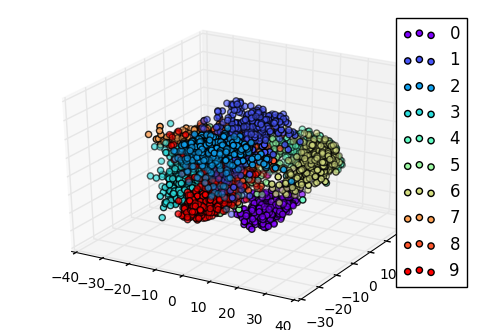

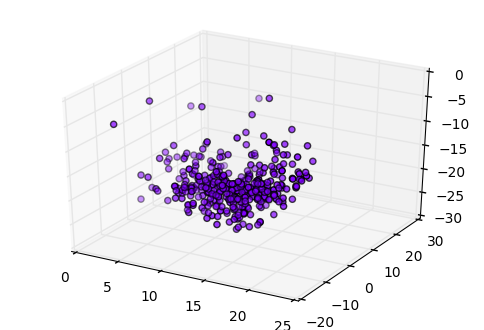

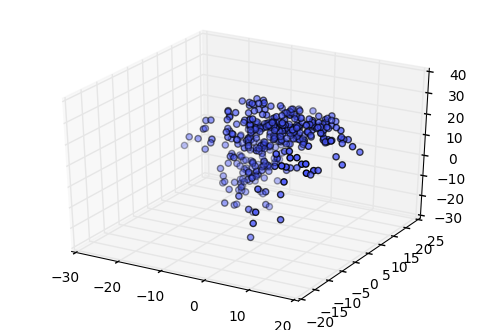

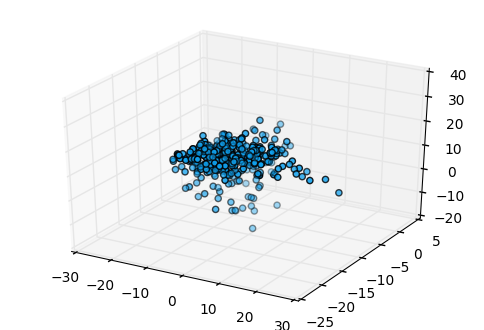

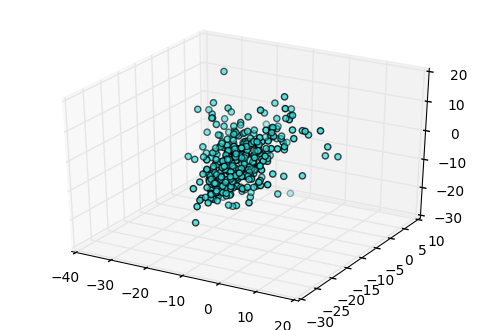

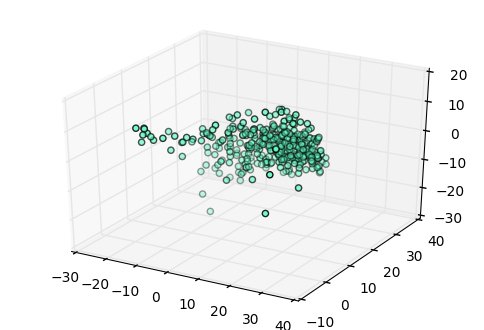

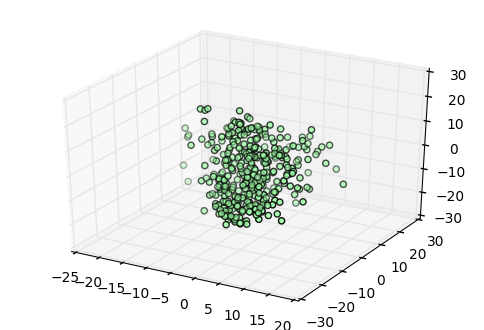

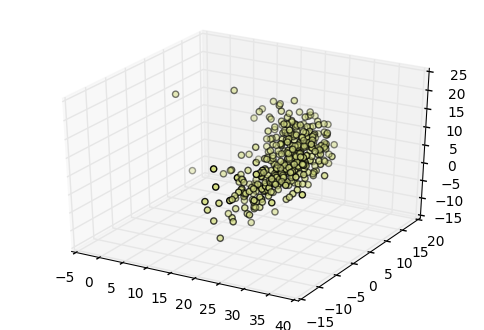

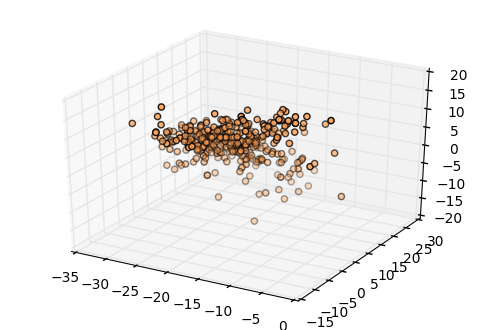

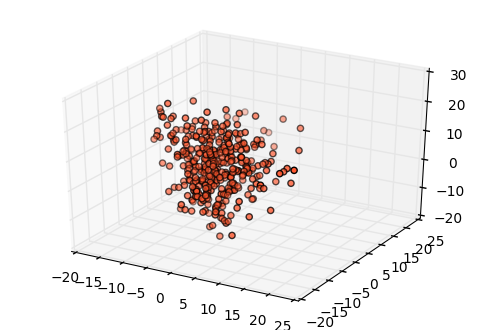

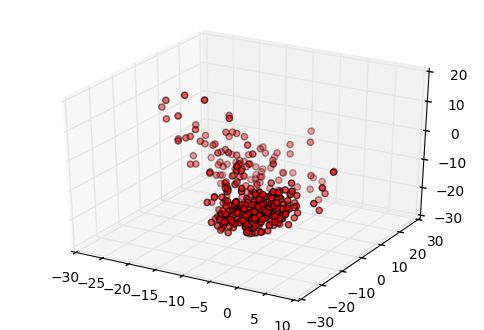

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
figs = [plt.figure().add_subplot(1, 1, 1, projection="3d") for i in range(10)]
concat = np.concatenate((Xtrain_pca, ytrain[:, None]), axis=1)
colors = cm.rainbow(np.linspace(0, 1, 10))
def choose(i, dimention, concat):
    return [x[dimention] for x in concat if x[-1] == i]
for i in range(10):
    ax.scatter(choose(i, 0, concat) ,choose(i, 1, concat), choose(i, 2, concat), c=colors[i])
    figs[i].axes.scatter(choose(i, 0, concat) ,choose(i, 1, concat), choose(i, 2, concat), c=colors[i])
ax.legend(np.arange(0, 10))

In [105]:
from sklearn.svm import SVC
estimator = PCA(n_components=20)
Xtrain_20, Xtest_20 = estimator.fit_transform(Xtrain), estimator.fit_transform(Xtest)


In [101]:
svm1 = SVC()
for i in range(460, 1000, 50):
    svm1.set_params(gamma=1/i)
    svm1.fit(Xtrain, ytrain)
    print(i, svm1.score(Xtest, ytest))

460 0.984409799555
510 0.985523385301
560 0.985523385301
610 0.986080178174
660 0.985523385301
710 0.984409799555
760 0.984966592428
810 0.984409799555
860 0.984409799555
910 0.983296213808
960 0.982739420935


In [106]:
svm2 = SVC(gamma = 1/600)
svm2.fit(Xtrain_20, ytrain)
print(svm2.score(Xtest_20, ytest))

0.346325167038
